In [1]:
# hide deprecation warnings, makes code messy and harder to read
# do not run this line if you want to see warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
'''Main'''
import numpy as np
import pandas as pd
import os

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''Data Prep'''
from sklearn import preprocessing as pp 
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss 
from sklearn.metrics import precision_recall_curve, average_precision_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report 

'''Algos'''
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [3]:
# Data Preparation

In [4]:
# Acquire Data
current_path = os.getcwd()
file = os.path.sep.join(['', 'datasets', 'credit_card_data', 'credit_card.csv'])
data = pd.read_csv(current_path + file)

In [5]:
# Explore Data
data.shape

(284807, 31)

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
print("Number of fraudulent transactions:", data['Class'].sum())

Number of fraudulent transactions: 492


In [10]:
nanCounter = np.isnan(data).sum()

In [11]:
nanCounter

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
distinctCounter = data.apply(lambda x: len(x.unique()))

In [13]:
distinctCounter

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [14]:
# Generate feature matrix and labels array
dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()

In [15]:
# Feature scaling
featuresToScale = dataX.drop(['Time'],axis=1).columns

In [16]:
featuresToScale

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [17]:
sX = pp.StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])
scalingFactors = pd.DataFrame(data=[sX.mean_,sX.scale_],index=['Mean','StDev'],columns=featuresToScale)

In [18]:
scalingFactors

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,...,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619
StDev,1.958692e+00,1.651306e+00,1.516252e+00,1.415866e+00,1.380244e+00,1.332269e+00,1.237091e+00,1.194351e+00,1.098630e+00,1.088848e+00,...,7.709237e-01,7.345227e-01,7.257003e-01,6.244592e-01,6.056460e-01,5.212772e-01,4.822262e-01,4.036318e-01,3.300827e-01,250.119670


In [19]:
dataX.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,94813.859575,-8.881566e-18,-1.277349e-17,-4.790058e-17,-1.955940e-17,3.832046e-17,9.979288e-18,1.476935e-17,3.293165e-18,9.979288e-20,...,-7.035398e-18,-4.989644e-19,2.794201e-18,9.380530e-18,1.117680e-17,-5.109395e-17,7.946008e-18,1.234937e-18,-6.336848e-18,2.913952e-17
std,47488.145955,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,0.000000,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,...,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,54201.500000,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,...,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,84692.000000,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,...,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,139320.500000,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,...,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,172792.000000,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,...,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


In [20]:
correlationMatrix = pd.DataFrame(data=[],index=dataX.columns,columns=dataX.columns)
for i in dataX.columns:
    for j in dataX.columns:
        correlationMatrix.loc[i,j] = np.round(pearsonr(dataX.loc[:,i],dataX.loc[:,j])[0],2)

In [21]:
correlation_file = os.path.sep.join(['', 'datasets', 'credit_card_data', 'correlationMatrix.csv'])
correlationMatrix.to_csv(current_path+correlation_file)

Text(0, 0.5, 'Frequency Percentage')

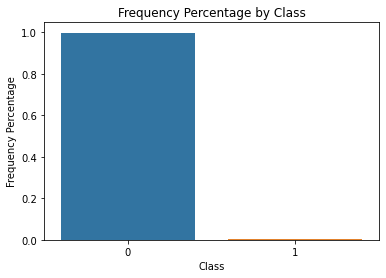

In [22]:
count_classes = pd.value_counts(data['Class'],sort=True).sort_index()
ax = sns.barplot(x=count_classes.index, y=tuple(count_classes/len(data)))
ax.set_title('Frequency Percentage by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency Percentage')

In [23]:
# Model Preparation

In [24]:
X_train, X_test, y_train, y_test = train_test_split(dataX, 
                                    dataY, test_size=0.33, 
                                    random_state=2018, stratify=dataY)

In [25]:
len(X_train)

190820

In [26]:
len(X_test)

93987

In [27]:
y_train.sum()/len(y_train)

0.0017293784718582959

In [28]:
y_test.sum()/len(y_test)

0.0017236426314277506

In [29]:
k_fold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2018)

In [30]:
# Logistic Regression

In [31]:
penalty = 'l2'
C = 1.0
class_weight = 'balanced'
random_state = 2018
solver = 'liblinear'
n_jobs = 1

logReg = LogisticRegression(penalty=penalty, C=C, 
            class_weight=class_weight, random_state=random_state, 
                            solver=solver, n_jobs=n_jobs)

In [32]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=[0,1])

model = logReg

for train_index, cv_index in k_fold.split(np.zeros(len(X_train))
                                          ,y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, 
                               model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = \
        model.predict_proba(X_cv_fold)  
    loglossCV = log_loss(y_cv_fold, 
                         predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossLogisticRegression = log_loss(y_train, 
                                     predictionsBasedOnKFolds.loc[:,1])
print('Logistic Regression Log Loss: ', loglossLogisticRegression)

Training Log Loss:  0.10966447974297726
CV Log Loss:  0.10878935130931706
Training Log Loss:  0.10456253063733129
CV Log Loss:  0.10403949172496346
Training Log Loss:  0.11541076739448172
CV Log Loss:  0.1176771926707053
Training Log Loss:  0.11558056645148104
CV Log Loss:  0.11816717136032324
Training Log Loss:  0.09709819816667255
CV Log Loss:  0.09697807129012988
Logistic Regression Log Loss:  0.10913025567108778


In [33]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()

In [34]:
precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])

In [35]:
average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.73')

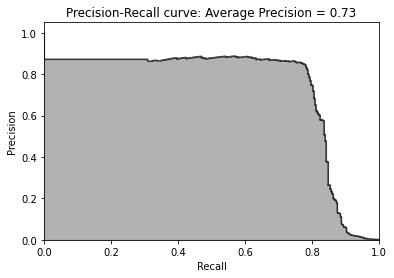

In [36]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

In [37]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])

In [38]:
areaUnderROC = auc(fpr, tpr)

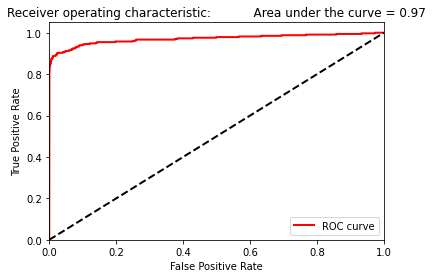

In [39]:
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [40]:
n_estimators = 10
max_features = 'auto'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0
max_leaf_nodes = None
bootstrap = True
oob_score = False
n_jobs = -1
random_state = 2018
class_weight = 'balanced'

RFC = RandomForestClassifier(n_estimators=n_estimators, 
        max_features=max_features, max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf, 
        max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap, 
        oob_score=oob_score, n_jobs=n_jobs, random_state=random_state, 
        class_weight=class_weight)

In [41]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=[0,1])

model = RFC

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, \
                                model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = \
        model.predict_proba(X_cv_fold)  
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossRandomForestsClassifier = log_loss(y_train, 
                                          predictionsBasedOnKFolds.loc[:,1])
print('Random Forests Log Loss: ', loglossRandomForestsClassifier)

Training Log Loss:  0.0004570758747246713
CV Log Loss:  0.009090797476425144
Training Log Loss:  0.0004101805310493279
CV Log Loss:  0.012640234648018377
Training Log Loss:  0.00040027341363592047
CV Log Loss:  0.009990776910341356
Training Log Loss:  0.0003894650263288808
CV Log Loss:  0.006620007375395402
Training Log Loss:  0.0004291016183715201
CV Log Loss:  0.01348243171548044
Random Forests Log Loss:  0.010364849625132141


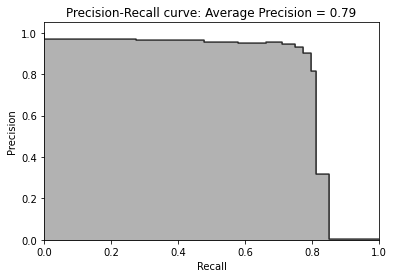

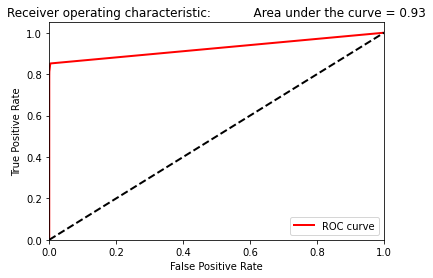

In [42]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsRandomForests = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(
          areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [43]:
params_xGB = {
    'nthread':24, #number of cores
    'learning rate': 0.3, #range 0 to 1, default 0.3
    'gamma': 0, #range 0 to infinity, default 0 
        # increase to reduce complexity (increase bias, reduce variance)
    'max_depth': 6, #range 1 to infinity, default 6
    'min_child_weight': 1, #range 0 to infinity, default 1
    'max_delta_step': 0, #range 0 to infinity, default 0
    'subsample': 1.0, #range 0 to 1, default 1
        # subsample ratio of the training examples
    'colsample_bytree': 1.0, #range 0 to 1, default 1 
        # subsample ratio of features
    'objective':'binary:logistic',
    'num_class':1,
    'eval_metric':'logloss',
    'seed':2018,
    'silent':1
}

In [44]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                    index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    dtrain = xgb.DMatrix(data=X_train_fold, label=y_train_fold)
    dCV = xgb.DMatrix(data=X_cv_fold)
    
    bst = xgb.cv(params_xGB, dtrain, num_boost_round=2000, 
                 nfold=5, early_stopping_rounds=200, verbose_eval=50)
    
    best_rounds = np.argmin(bst['test-logloss-mean'])
    bst = xgb.train(params_xGB, dtrain, best_rounds)
    
    loglossTraining = log_loss(y_train_fold, bst.predict(dtrain))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = \
        bst.predict(dCV)
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossXGBoostGradientBoosting = \
    log_loss(y_train, predictionsBasedOnKFolds.loc[:,'prediction'])
print('XGBoost Gradient Boosting Log Loss: ', loglossXGBoostGradientBoosting)

[20:15:08] WARNING: /workspace/src/learner.cc:480: 
Parameters: { learning rate, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:15:08] WARNING: /workspace/src/learner.cc:480: 
Parameters: { learning rate, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:15:08] WARNING: /workspace/src/learner.cc:480: 
Parameters: { learning rate, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. P

[20:20:39] WARNING: /workspace/src/learner.cc:480: 
Parameters: { learning rate, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.43800+0.00002	test-logloss:0.43806+0.00004
[50]	train-logloss:0.00015+0.00001	test-logloss:0.00342+0.00053
[100]	train-logloss:0.00006+0.00000	test-logloss:0.00371+0.00062
[150]	train-logloss:0.00004+0.00000	test-logloss:0.00383+0.00065
[200]	train-logloss:0.00004+0.00000	test-logloss:0.00389+0.00066
[20:22:23] WARNING: /workspace/src/learner.cc:480: 
Parameters: { learning rate, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you 

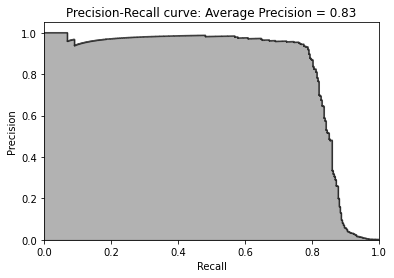

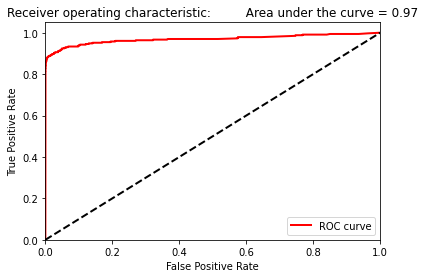

In [45]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsXGBoostGradientBoosting = preds.copy()

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
        Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [46]:
params_lightGB = {
    'task': 'train',
    'application':'binary',
    'num_class':1,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'bagging_seed': 2018,
    'verbose': 0,
    'num_threads':24
}

In [47]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
                   valid_sets=lgb_eval, early_stopping_rounds=200)
    
    loglossTraining = log_loss(y_train_fold, \
                gbm.predict(X_train_fold, num_iteration=gbm.best_iteration))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = \
        gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration) 
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossLightGBMGradientBoosting = \
    log_loss(y_train, predictionsBasedOnKFolds.loc[:,'prediction'])
print('LightGBM Gradient Boosting Log Loss: ', loglossLightGBMGradientBoosting)

[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_logloss: 0.00634115
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_logloss: 0.00627113
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_logloss: 0.00620105
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	vali

[123]	valid_0's binary_logloss: 0.00346492
[124]	valid_0's binary_logloss: 0.00345694
[125]	valid_0's binary_logloss: 0.0034481
[126]	valid_0's binary_logloss: 0.00343914
[127]	valid_0's binary_logloss: 0.00343121
[128]	valid_0's binary_logloss: 0.00342351
[129]	valid_0's binary_logloss: 0.0034149
[130]	valid_0's binary_logloss: 0.00340701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[131]	valid_0's binary_logloss: 0.00339861
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[132]	valid_0's binary_logloss: 0.00339105
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[133]	valid_0's binary_logloss: 0.00338469
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[134]	valid_0's binary_logloss: 0.00337809
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[135]	valid_0's binary_logloss: 0.0033719
[LightGBM] [Warning] No further splits with positive gain, best gain:

[244]	valid_0's binary_logloss: 0.00294238
[245]	valid_0's binary_logloss: 0.00294171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[246]	valid_0's binary_logloss: 0.00293989
[247]	valid_0's binary_logloss: 0.0029375
[248]	valid_0's binary_logloss: 0.00293619
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[249]	valid_0's binary_logloss: 0.00293377
[250]	valid_0's binary_logloss: 0.00293203
[251]	valid_0's binary_logloss: 0.00292904
[252]	valid_0's binary_logloss: 0.00292783
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[253]	valid_0's binary_logloss: 0.00292624
[254]	valid_0's binary_logloss: 0.00292294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[255]	valid_0's binary_logloss: 0.00292131
[256]	valid_0's binary_logloss: 0.00292002
[257]	valid_0's binary_logloss: 0.0029185
[258]	valid_0's binary_logloss: 0.00291649
[259]	valid_0's binary_logloss: 0.00291366
[260]	valid_0'

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[375]	valid_0's binary_logloss: 0.00278294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[376]	valid_0's binary_logloss: 0.00278262
[377]	valid_0's binary_logloss: 0.00278305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[378]	valid_0's binary_logloss: 0.00278221
[379]	valid_0's binary_logloss: 0.00278054
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[380]	valid_0's binary_logloss: 0.00277998
[381]	valid_0's binary_logloss: 0.00277796
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[382]	valid_0's binary_logloss: 0.00277552
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[383]	valid_0's binary_logloss: 0.00277482
[384]	valid_0's binary_logloss: 0.00277562
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[385]	valid_0's binary_logloss: 0.00277411
[L

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[455]	valid_0's binary_logloss: 0.00273628
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[456]	valid_0's binary_logloss: 0.00273655
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[457]	valid_0's binary_logloss: 0.00273678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[458]	valid_0's binary_logloss: 0.00273615
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[459]	valid_0's binary_logloss: 0.00273638
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[460]	valid_0's binary_logloss: 0.0027354
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[461]	valid_0's binary_logloss: 0.00273571
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[462]	valid_0's binary_logloss: 0.00273564
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[533]	valid_0's binary_logloss: 0.00270433
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[534]	valid_0's binary_logloss: 0.00270391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[535]	valid_0's binary_logloss: 0.00270336
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[536]	valid_0's binary_logloss: 0.00270364
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[537]	valid_0's binary_logloss: 0.00270375
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[538]	valid_0's binary_logloss: 0.00270335
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[539]	valid_0's binary_logloss: 0.00270113
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[540]	valid_0's binary_logloss: 0.00270167
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[622]	valid_0's binary_logloss: 0.00268668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[623]	valid_0's binary_logloss: 0.00268575
[624]	valid_0's binary_logloss: 0.00268568
[625]	valid_0's binary_logloss: 0.00268603
[626]	valid_0's binary_logloss: 0.00268578
[627]	valid_0's binary_logloss: 0.00268558
[628]	valid_0's binary_logloss: 0.00268598
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[629]	valid_0's binary_logloss: 0.00268512
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[630]	valid_0's binary_logloss: 0.0026849
[631]	valid_0's binary_logloss: 0.00268565
[632]	valid_0's binary_logloss: 0.00268582
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[633]	valid_0's binary_logloss: 0.002686
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[634]	valid_0's binary_logloss: 0.002

[732]	valid_0's binary_logloss: 0.00266395
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[733]	valid_0's binary_logloss: 0.00266356
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[734]	valid_0's binary_logloss: 0.00266284
[735]	valid_0's binary_logloss: 0.00266413
[736]	valid_0's binary_logloss: 0.00266335
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[737]	valid_0's binary_logloss: 0.00266266
[738]	valid_0's binary_logloss: 0.00266266
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[739]	valid_0's binary_logloss: 0.00266195
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[740]	valid_0's binary_logloss: 0.0026612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[741]	valid_0's binary_logloss: 0.00266136
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[742]	valid_0's binary_logloss: 0.00266066
[74

[841]	valid_0's binary_logloss: 0.00264619
[842]	valid_0's binary_logloss: 0.00264611
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[843]	valid_0's binary_logloss: 0.00264535
[844]	valid_0's binary_logloss: 0.00264564
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[845]	valid_0's binary_logloss: 0.00264646
[846]	valid_0's binary_logloss: 0.00264635
[847]	valid_0's binary_logloss: 0.00264684
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[848]	valid_0's binary_logloss: 0.0026459
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[849]	valid_0's binary_logloss: 0.00264381
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[850]	valid_0's binary_logloss: 0.00264311
[851]	valid_0's binary_logloss: 0.00264313
[852]	valid_0's binary_logloss: 0.00264293
[853]	valid_0's binary_logloss: 0.00264208
[854]	valid_0's binary_logloss: 0.00264261
[LightGBM] [Warning] No 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[936]	valid_0's binary_logloss: 0.00263794
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[937]	valid_0's binary_logloss: 0.00263835
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[938]	valid_0's binary_logloss: 0.00263831
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[939]	valid_0's binary_logloss: 0.00263847
[940]	valid_0's binary_logloss: 0.00263851
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[941]	valid_0's binary_logloss: 0.00263867
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[942]	valid_0's binary_logloss: 0.00263885
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[943]	valid_0's binary_logloss: 0.0026382
[944]	valid_0's binary_logloss: 0.00263854
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[945]	valid_0'

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1024]	valid_0's binary_logloss: 0.00263544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1025]	valid_0's binary_logloss: 0.00263534
[1026]	valid_0's binary_logloss: 0.00263508
[1027]	valid_0's binary_logloss: 0.00263523
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1028]	valid_0's binary_logloss: 0.00263513
[1029]	valid_0's binary_logloss: 0.00263592
[1030]	valid_0's binary_logloss: 0.00263486
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1031]	valid_0's binary_logloss: 0.00263589
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1032]	valid_0's binary_logloss: 0.00263531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1033]	valid_0's binary_logloss: 0.00263583
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1034]	valid_0's binary_logloss: 0.

[1138]	valid_0's binary_logloss: 0.0026343
[1139]	valid_0's binary_logloss: 0.00263449
[1140]	valid_0's binary_logloss: 0.00263495
[1141]	valid_0's binary_logloss: 0.00263498
[1142]	valid_0's binary_logloss: 0.00263565
[1143]	valid_0's binary_logloss: 0.00263598
[1144]	valid_0's binary_logloss: 0.00263543
[1145]	valid_0's binary_logloss: 0.00263629
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1146]	valid_0's binary_logloss: 0.00263675
[1147]	valid_0's binary_logloss: 0.0026351
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1148]	valid_0's binary_logloss: 0.00263424
[1149]	valid_0's binary_logloss: 0.00263261
[1150]	valid_0's binary_logloss: 0.00263377
[1151]	valid_0's binary_logloss: 0.00263342
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1152]	valid_0's binary_logloss: 0.00263388
[1153]	valid_0's binary_logloss: 0.0026334
[1154]	valid_0's binary_logloss: 0.00263299
[1155]	valid_0's binary_loglos

[1255]	valid_0's binary_logloss: 0.00265432
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1256]	valid_0's binary_logloss: 0.00265471
[1257]	valid_0's binary_logloss: 0.00265476
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1258]	valid_0's binary_logloss: 0.00265645
[1259]	valid_0's binary_logloss: 0.00265673
[1260]	valid_0's binary_logloss: 0.00265661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1261]	valid_0's binary_logloss: 0.00265831
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1262]	valid_0's binary_logloss: 0.00265871
[1263]	valid_0's binary_logloss: 0.00265899
[1264]	valid_0's binary_logloss: 0.00265849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1265]	valid_0's binary_logloss: 0.00265849
[1266]	valid_0's binary_logloss: 0.00265892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1267]	valid_0's binar

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_logloss: 0.00640575
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_logloss: 0.00634752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_logloss: 0.00628641
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_logloss: 0.00623805
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0's binary_logloss: 0.00618348
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7]	valid_0's binary_logloss: 0.00612912
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[8]	valid_0's binary_logloss: 0.00608272
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[9]	valid_0's binary_logloss: 0.00603122
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[134]	valid_0's binary_logloss: 0.00353208
[135]	valid_0's binary_logloss: 0.00352513
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[136]	valid_0's binary_logloss: 0.00352028
[137]	valid_0's binary_logloss: 0.00351449
[138]	valid_0's binary_logloss: 0.00350774
[139]	valid_0's binary_logloss: 0.00350089
[140]	valid_0's binary_logloss: 0.00349413
[141]	valid_0's binary_logloss: 0.0034875
[142]	valid_0's binary_logloss: 0.00348119
[143]	valid_0's binary_logloss: 0.0034732
[144]	valid_0's binary_logloss: 0.00346726
[145]	valid_0's binary_logloss: 0.00346105
[146]	valid_0's binary_logloss: 0.00345488
[147]	valid_0's binary_logloss: 0.00344756
[148]	valid_0's binary_logloss: 0.00344166
[149]	valid_0's binary_logloss: 0.00343619
[150]	valid_0's binary_logloss: 0.00343044
[151]	valid_0's binary_logloss: 0.00342476
[152]	valid_0's binary_logloss: 0.00341955
[153]	valid_0's binary_logloss: 0.0

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[260]	valid_0's binary_logloss: 0.00307183
[261]	valid_0's binary_logloss: 0.00307006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[262]	valid_0's binary_logloss: 0.00306916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[263]	valid_0's binary_logloss: 0.0030677
[264]	valid_0's binary_logloss: 0.00306647
[265]	valid_0's binary_logloss: 0.00306398
[266]	valid_0's binary_logloss: 0.00306246
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[267]	valid_0's binary_logloss: 0.00306077
[268]	valid_0's binary_logloss: 0.00305952
[269]	valid_0's binary_logloss: 0.00305805
[270]	valid_0's binary_logloss: 0.00305703
[271]	valid_0's binary_logloss: 0.0030559
[272]	valid_0's binary_logloss: 0.00305442
[273]	valid_0's binary_logloss: 0.00305346
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[274]	valid_0's binary_lo

[423]	valid_0's binary_logloss: 0.00297179
[424]	valid_0's binary_logloss: 0.00297134
[425]	valid_0's binary_logloss: 0.00297088
[426]	valid_0's binary_logloss: 0.00296953
[427]	valid_0's binary_logloss: 0.00296825
[428]	valid_0's binary_logloss: 0.00296795
[429]	valid_0's binary_logloss: 0.00296731
[430]	valid_0's binary_logloss: 0.00296584
[431]	valid_0's binary_logloss: 0.00296723
[432]	valid_0's binary_logloss: 0.00296762
[433]	valid_0's binary_logloss: 0.00296706
[434]	valid_0's binary_logloss: 0.00296672
[435]	valid_0's binary_logloss: 0.00296549
[436]	valid_0's binary_logloss: 0.00296544
[437]	valid_0's binary_logloss: 0.00296656
[438]	valid_0's binary_logloss: 0.00296711
[439]	valid_0's binary_logloss: 0.00296692
[440]	valid_0's binary_logloss: 0.00296836
[441]	valid_0's binary_logloss: 0.00296806
[442]	valid_0's binary_logloss: 0.00296711
[443]	valid_0's binary_logloss: 0.00296442
[444]	valid_0's binary_logloss: 0.00296412
[445]	valid_0's binary_logloss: 0.00296357
[446]	valid

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[557]	valid_0's binary_logloss: 0.00293745
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[558]	valid_0's binary_logloss: 0.00293815
[559]	valid_0's binary_logloss: 0.00293852
[560]	valid_0's binary_logloss: 0.00293762
[561]	valid_0's binary_logloss: 0.00293918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[562]	valid_0's binary_logloss: 0.00293913
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[563]	valid_0's binary_logloss: 0.00293901
[564]	valid_0's binary_logloss: 0.00293951
[565]	valid_0's binary_logloss: 0.00293965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[566]	valid_0's binary_logloss: 0.00293924
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[567]	valid_0's binary_logloss: 0.00293911
[568]	valid_0's binary_logloss: 0.0029404
[569]	valid_0's binary_logloss: 0.0

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[661]	valid_0's binary_logloss: 0.00292806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[662]	valid_0's binary_logloss: 0.00292737
[663]	valid_0's binary_logloss: 0.00292864
[664]	valid_0's binary_logloss: 0.00292793
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[665]	valid_0's binary_logloss: 0.00292746
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[666]	valid_0's binary_logloss: 0.00292737
[667]	valid_0's binary_logloss: 0.00292795
[668]	valid_0's binary_logloss: 0.00292759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[669]	valid_0's binary_logloss: 0.00292676
[670]	valid_0's binary_logloss: 0.00292651
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[671]	valid_0's binary_logloss: 0.00292552
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6

[767]	valid_0's binary_logloss: 0.00293492
[768]	valid_0's binary_logloss: 0.00293533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[769]	valid_0's binary_logloss: 0.00293512
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[770]	valid_0's binary_logloss: 0.00293512
[771]	valid_0's binary_logloss: 0.00293673
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[772]	valid_0's binary_logloss: 0.00293668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[773]	valid_0's binary_logloss: 0.00293612
[774]	valid_0's binary_logloss: 0.00293673
[775]	valid_0's binary_logloss: 0.00293754
[776]	valid_0's binary_logloss: 0.00293815
[777]	valid_0's binary_logloss: 0.00293745
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[778]	valid_0's binary_logloss: 0.0029369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[779]	valid_0's binary_logloss: 0.0

[866]	valid_0's binary_logloss: 0.00295339
[867]	valid_0's binary_logloss: 0.00295285
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[868]	valid_0's binary_logloss: 0.00295244
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[869]	valid_0's binary_logloss: 0.00295191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[870]	valid_0's binary_logloss: 0.00295215
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[871]	valid_0's binary_logloss: 0.00295266
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[872]	valid_0's binary_logloss: 0.00295314
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[873]	valid_0's binary_logloss: 0.00295273
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[874]	valid_0's binary_logloss: 0.00295308
[875]	valid_0's binary_logloss: 0.00295419
[LightGBM] [Warning] No further splits with p

[109]	valid_0's binary_logloss: 0.00309455
[110]	valid_0's binary_logloss: 0.00308541
[111]	valid_0's binary_logloss: 0.00307488
[112]	valid_0's binary_logloss: 0.00306486
[113]	valid_0's binary_logloss: 0.00305471
[114]	valid_0's binary_logloss: 0.00304422
[115]	valid_0's binary_logloss: 0.00303583
[116]	valid_0's binary_logloss: 0.00302595
[117]	valid_0's binary_logloss: 0.00301825
[118]	valid_0's binary_logloss: 0.00300806
[119]	valid_0's binary_logloss: 0.00300106
[120]	valid_0's binary_logloss: 0.00299154
[121]	valid_0's binary_logloss: 0.00298153
[122]	valid_0's binary_logloss: 0.00297198
[123]	valid_0's binary_logloss: 0.00296283
[124]	valid_0's binary_logloss: 0.00295314
[125]	valid_0's binary_logloss: 0.00294484
[126]	valid_0's binary_logloss: 0.00293715
[127]	valid_0's binary_logloss: 0.00292926
[128]	valid_0's binary_logloss: 0.00292061
[129]	valid_0's binary_logloss: 0.00291335
[130]	valid_0's binary_logloss: 0.0029052
[131]	valid_0's binary_logloss: 0.00289725
[132]	valid_

[271]	valid_0's binary_logloss: 0.00240723
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[272]	valid_0's binary_logloss: 0.00240561
[273]	valid_0's binary_logloss: 0.00240473
[274]	valid_0's binary_logloss: 0.00240429
[275]	valid_0's binary_logloss: 0.00240388
[276]	valid_0's binary_logloss: 0.00240316
[277]	valid_0's binary_logloss: 0.00240293
[278]	valid_0's binary_logloss: 0.00240257
[279]	valid_0's binary_logloss: 0.00240173
[280]	valid_0's binary_logloss: 0.00240141
[281]	valid_0's binary_logloss: 0.00240123
[282]	valid_0's binary_logloss: 0.00240091
[283]	valid_0's binary_logloss: 0.00239982
[284]	valid_0's binary_logloss: 0.00239981
[285]	valid_0's binary_logloss: 0.00239969
[286]	valid_0's binary_logloss: 0.00239946
[287]	valid_0's binary_logloss: 0.00239839
[288]	valid_0's binary_logloss: 0.00239787
[289]	valid_0's binary_logloss: 0.00239721
[290]	valid_0's binary_logloss: 0.00239715
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[391]	valid_0's binary_logloss: 0.00232878
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[392]	valid_0's binary_logloss: 0.00232842
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[393]	valid_0's binary_logloss: 0.00232833
[394]	valid_0's binary_logloss: 0.00232743
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[395]	valid_0's binary_logloss: 0.00232719
[396]	valid_0's binary_logloss: 0.00232616
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[397]	valid_0's binary_logloss: 0.00232594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[398]	valid_0's binary_logloss: 0.00232497
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[399]	valid_0's binary_logloss: 0.00232508
[400]	valid_0's binary_logloss: 0.0023239
[LightGBM] [Warning] No further splits with po

[476]	valid_0's binary_logloss: 0.00228512
[477]	valid_0's binary_logloss: 0.00228447
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[478]	valid_0's binary_logloss: 0.00228335
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[479]	valid_0's binary_logloss: 0.00228222
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[480]	valid_0's binary_logloss: 0.0022819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[481]	valid_0's binary_logloss: 0.00228135
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[482]	valid_0's binary_logloss: 0.00228124
[483]	valid_0's binary_logloss: 0.00228033
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[484]	valid_0's binary_logloss: 0.00228022
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[485]	valid_0's binary_logloss: 0.00228013
[LightGBM] [Warning] No further splits with po

[561]	valid_0's binary_logloss: 0.00225612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[562]	valid_0's binary_logloss: 0.00225615
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[563]	valid_0's binary_logloss: 0.00225564
[564]	valid_0's binary_logloss: 0.00225514
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[565]	valid_0's binary_logloss: 0.00225473
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[566]	valid_0's binary_logloss: 0.00225477
[567]	valid_0's binary_logloss: 0.00225439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[568]	valid_0's binary_logloss: 0.00225391
[569]	valid_0's binary_logloss: 0.00225377
[570]	valid_0's binary_logloss: 0.00225453
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[571]	valid_0's binary_logloss: 0.00225331
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[647]	valid_0's binary_logloss: 0.00223718
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[648]	valid_0's binary_logloss: 0.00223703
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[649]	valid_0's binary_logloss: 0.00223704
[650]	valid_0's binary_logloss: 0.00223715
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[651]	valid_0's binary_logloss: 0.00223711
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[652]	valid_0's binary_logloss: 0.00223756
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[653]	valid_0's binary_logloss: 0.0022366
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[654]	valid_0's binary_logloss: 0.00223554
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[655]	valid_0's binary_logloss: 0.00223601
[LightGBM] [Wa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[728]	valid_0's binary_logloss: 0.00223518
[729]	valid_0's binary_logloss: 0.00223566
[730]	valid_0's binary_logloss: 0.00223662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[731]	valid_0's binary_logloss: 0.00223637
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[732]	valid_0's binary_logloss: 0.00223622
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[733]	valid_0's binary_logloss: 0.00223591
[734]	valid_0's binary_logloss: 0.00223713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[735]	valid_0's binary_logloss: 0.00223658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[736]	valid_0's binary_logloss: 0.00223696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[737]	valid_0's binary_logloss: 0.00223671
[LightGBM] [Warning] No further splits with p

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[821]	valid_0's binary_logloss: 0.00224531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[822]	valid_0's binary_logloss: 0.00224489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[823]	valid_0's binary_logloss: 0.00224497
[824]	valid_0's binary_logloss: 0.0022443
[825]	valid_0's binary_logloss: 0.00224423
[826]	valid_0's binary_logloss: 0.00224461
[827]	valid_0's binary_logloss: 0.00224422
[828]	valid_0's binary_logloss: 0.00224348
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[829]	valid_0's binary_logloss: 0.0022439
[830]	valid_0's binary_logloss: 0.00224348
[831]	valid_0's binary_logloss: 0.00224285
[832]	valid_0's binary_logloss: 0.00224428
[833]	valid_0's binary_logloss: 0.00224357
[834]	valid_0's binary_logloss: 0.00224354
[835]	valid_0's binary_logloss: 0.00224336
[836]	valid_0's binary_logloss: 0.00224385
[LightGBM] [Wa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[928]	valid_0's binary_logloss: 0.00223959
[929]	valid_0's binary_logloss: 0.00223886
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[930]	valid_0's binary_logloss: 0.0022385
[931]	valid_0's binary_logloss: 0.0022384
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[932]	valid_0's binary_logloss: 0.00223833
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[933]	valid_0's binary_logloss: 0.00223835
[934]	valid_0's binary_logloss: 0.0022373
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[935]	valid_0's binary_logloss: 0.00223755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[936]	valid_0's binary_logloss: 0.00223806
[937]	valid_0's binary_logloss: 0.00223862
[938]	valid_0's binary_logloss: 0.00223858
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[939]

[81]	valid_0's binary_logloss: 0.00379943
[82]	valid_0's binary_logloss: 0.00378428
[83]	valid_0's binary_logloss: 0.00376992
[84]	valid_0's binary_logloss: 0.00375481
[85]	valid_0's binary_logloss: 0.00374108
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[86]	valid_0's binary_logloss: 0.003727
[87]	valid_0's binary_logloss: 0.00371356
[88]	valid_0's binary_logloss: 0.00370082
[89]	valid_0's binary_logloss: 0.00368862
[90]	valid_0's binary_logloss: 0.00367595
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[91]	valid_0's binary_logloss: 0.00366359
[92]	valid_0's binary_logloss: 0.00365158
[93]	valid_0's binary_logloss: 0.00363906
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[94]	valid_0's binary_logloss: 0.00362726
[95]	valid_0's binary_logloss: 0.00361625
[96]	valid_0's binary_logloss: 0.00360559
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[97]	valid_0's binary_logloss:

[220]	valid_0's binary_logloss: 0.00289455
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[221]	valid_0's binary_logloss: 0.00289107
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[222]	valid_0's binary_logloss: 0.00288911
[223]	valid_0's binary_logloss: 0.00288367
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[224]	valid_0's binary_logloss: 0.00288126
[225]	valid_0's binary_logloss: 0.00287912
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[226]	valid_0's binary_logloss: 0.00287604
[227]	valid_0's binary_logloss: 0.0028711
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[228]	valid_0's binary_logloss: 0.00286878
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[229]	valid_0's binary_logloss: 0.0028658
[230]	valid_0's binary_logloss: 0.00286428
[231]	valid_0's binary_logloss: 0.00286265
[LightGBM] [Warning] No further spli

[353]	valid_0's binary_logloss: 0.00271157
[354]	valid_0's binary_logloss: 0.0027113
[355]	valid_0's binary_logloss: 0.00271045
[356]	valid_0's binary_logloss: 0.00270912
[357]	valid_0's binary_logloss: 0.00270889
[358]	valid_0's binary_logloss: 0.00270779
[359]	valid_0's binary_logloss: 0.00270725
[360]	valid_0's binary_logloss: 0.00270586
[361]	valid_0's binary_logloss: 0.00270478
[362]	valid_0's binary_logloss: 0.00270524
[363]	valid_0's binary_logloss: 0.00270407
[364]	valid_0's binary_logloss: 0.00270331
[365]	valid_0's binary_logloss: 0.00270379
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[366]	valid_0's binary_logloss: 0.00270373
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[367]	valid_0's binary_logloss: 0.0027039
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[368]	valid_0's binary_logloss: 0.00270385
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[369]	valid_0'

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[446]	valid_0's binary_logloss: 0.0026895
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[447]	valid_0's binary_logloss: 0.00269006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[448]	valid_0's binary_logloss: 0.00268978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[449]	valid_0's binary_logloss: 0.00269046
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[450]	valid_0's binary_logloss: 0.00268974
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[451]	valid_0's binary_logloss: 0.00268924
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[452]	valid_0's binary_logloss: 0.00268958
[453]	valid_0's binary_logloss: 0.00268999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[454]	valid_0's binary_logloss: 0.00268998
[LightGBM] [Wa

[527]	valid_0's binary_logloss: 0.00267371
[528]	valid_0's binary_logloss: 0.002674
[529]	valid_0's binary_logloss: 0.00267283
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[530]	valid_0's binary_logloss: 0.00267262
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[531]	valid_0's binary_logloss: 0.00267267
[532]	valid_0's binary_logloss: 0.00267238
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[533]	valid_0's binary_logloss: 0.00267255
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[534]	valid_0's binary_logloss: 0.00267273
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[535]	valid_0's binary_logloss: 0.00267207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[536]	valid_0's binary_logloss: 0.00267212
[537]	valid_0's binary_logloss: 0.00267173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[538

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[606]	valid_0's binary_logloss: 0.00266521
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[607]	valid_0's binary_logloss: 0.00266544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[608]	valid_0's binary_logloss: 0.00266545
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[609]	valid_0's binary_logloss: 0.00266546
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[610]	valid_0's binary_logloss: 0.00266546
[611]	valid_0's binary_logloss: 0.00266593
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[612]	valid_0's binary_logloss: 0.0026656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[613]	valid_0's binary_logloss: 0.002665
[614]	valid_0's binary_logloss: 0.00266548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[615]	valid_0's 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[693]	valid_0's binary_logloss: 0.00265665
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[694]	valid_0's binary_logloss: 0.00265605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[695]	valid_0's binary_logloss: 0.00265617
[696]	valid_0's binary_logloss: 0.00265526
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[697]	valid_0's binary_logloss: 0.00265529
[698]	valid_0's binary_logloss: 0.00265454
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[699]	valid_0's binary_logloss: 0.00265434
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[700]	valid_0's binary_logloss: 0.00265466
[701]	valid_0's binary_logloss: 0.00265417
[702]	valid_0's binary_logloss: 0.00265328
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[703]	valid_0's binary_logloss: 0.00265371
[L

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[785]	valid_0's binary_logloss: 0.00265528
[786]	valid_0's binary_logloss: 0.00265433
[787]	valid_0's binary_logloss: 0.00265518
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[788]	valid_0's binary_logloss: 0.0026559
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[789]	valid_0's binary_logloss: 0.00265646
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[790]	valid_0's binary_logloss: 0.00265471
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[791]	valid_0's binary_logloss: 0.00265429
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[792]	valid_0's binary_logloss: 0.00265473
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[793]	valid_0's binary_logloss: 0.00265554
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[794]	valid_0'

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[862]	valid_0's binary_logloss: 0.00266656
[863]	valid_0's binary_logloss: 0.00266672
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[864]	valid_0's binary_logloss: 0.00266709
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[865]	valid_0's binary_logloss: 0.00266683
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[866]	valid_0's binary_logloss: 0.00266534
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[867]	valid_0's binary_logloss: 0.00266592
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[868]	valid_0's binary_logloss: 0.00266631
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[869]	valid_0's binary_logloss: 0.00266764
[870]	valid_0's binary_logloss: 0.00266804
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[871]	valid_0

[955]	valid_0's binary_logloss: 0.00267672
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[956]	valid_0's binary_logloss: 0.00267647
[957]	valid_0's binary_logloss: 0.00267702
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[958]	valid_0's binary_logloss: 0.00267694
[959]	valid_0's binary_logloss: 0.00267672
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[960]	valid_0's binary_logloss: 0.00267696
[961]	valid_0's binary_logloss: 0.00267734
[962]	valid_0's binary_logloss: 0.00267706
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[963]	valid_0's binary_logloss: 0.00267729
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[964]	valid_0's binary_logloss: 0.00267721
[965]	valid_0's binary_logloss: 0.00267862
[966]	valid_0's binary_logloss: 0.00267968
[967]	valid_0's binary_logloss: 0.00267963
[LightGBM] [Warning] No further splits with positive gain, best ga

[34]	valid_0's binary_logloss: 0.00534782
[35]	valid_0's binary_logloss: 0.00532244
[36]	valid_0's binary_logloss: 0.00529802
[37]	valid_0's binary_logloss: 0.00527524
[38]	valid_0's binary_logloss: 0.00525276
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[39]	valid_0's binary_logloss: 0.00523085
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	valid_0's binary_logloss: 0.00520734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[41]	valid_0's binary_logloss: 0.00518486
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[42]	valid_0's binary_logloss: 0.00516243
[43]	valid_0's binary_logloss: 0.00514242
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[44]	valid_0's binary_logloss: 0.00512065
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[45]	valid_0's binary_logloss: 0.00509974
[46]	valid_0's binary_logloss: 0.00507913
[Lig

[172]	valid_0's binary_logloss: 0.00392306
[173]	valid_0's binary_logloss: 0.00391971
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[174]	valid_0's binary_logloss: 0.00391571
[175]	valid_0's binary_logloss: 0.00391269
[176]	valid_0's binary_logloss: 0.00390881
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[177]	valid_0's binary_logloss: 0.00390549
[178]	valid_0's binary_logloss: 0.00390192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[179]	valid_0's binary_logloss: 0.00389947
[180]	valid_0's binary_logloss: 0.00389682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[181]	valid_0's binary_logloss: 0.00389373
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[182]	valid_0's binary_logloss: 0.00389115
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[183]	valid_0's binary_logloss: 0.0038888
[LightGBM] [Warning] No further spl

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[270]	valid_0's binary_logloss: 0.00374282
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[271]	valid_0's binary_logloss: 0.00374203
[272]	valid_0's binary_logloss: 0.00374096
[273]	valid_0's binary_logloss: 0.00374072
[274]	valid_0's binary_logloss: 0.00373953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[275]	valid_0's binary_logloss: 0.00373807
[276]	valid_0's binary_logloss: 0.00373546
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[277]	valid_0's binary_logloss: 0.0037345
[278]	valid_0's binary_logloss: 0.00373421
[279]	valid_0's binary_logloss: 0.00373358
[280]	valid_0's binary_logloss: 0.00373147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[281]	valid_0's binary_logloss: 0.00373109
[282]	valid_0's binary_logloss: 0.00372953
[283]	valid_0's binary_logloss: 0.00372753
[284]	valid_0's binary_l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[374]	valid_0's binary_logloss: 0.00365531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[375]	valid_0's binary_logloss: 0.0036556
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[376]	valid_0's binary_logloss: 0.00365363
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[377]	valid_0's binary_logloss: 0.00365341
[378]	valid_0's binary_logloss: 0.00365267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[379]	valid_0's binary_logloss: 0.00365089
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[380]	valid_0's binary_logloss: 0.00365072
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[381]	valid_0's binary_logloss: 0.0036507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[382]	valid_0's binary_logloss: 0.00365057
[383]	valid_0's

[463]	valid_0's binary_logloss: 0.00363129
[464]	valid_0's binary_logloss: 0.00363018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[465]	valid_0's binary_logloss: 0.00362932
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[466]	valid_0's binary_logloss: 0.00362869
[467]	valid_0's binary_logloss: 0.00362767
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[468]	valid_0's binary_logloss: 0.00362814
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[469]	valid_0's binary_logloss: 0.00362805
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[470]	valid_0's binary_logloss: 0.00362827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[471]	valid_0's binary_logloss: 0.00362744
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[472]	valid_0's binary_logloss: 0.00362758
[LightGBM] [Warning] No further splits with p

[555]	valid_0's binary_logloss: 0.00360649
[556]	valid_0's binary_logloss: 0.00360646
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[557]	valid_0's binary_logloss: 0.00360647
[558]	valid_0's binary_logloss: 0.00360526
[559]	valid_0's binary_logloss: 0.00360506
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[560]	valid_0's binary_logloss: 0.00360498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[561]	valid_0's binary_logloss: 0.00360529
[562]	valid_0's binary_logloss: 0.00360521
[563]	valid_0's binary_logloss: 0.00360534
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[564]	valid_0's binary_logloss: 0.00360524
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[565]	valid_0's binary_logloss: 0.00360542
[566]	valid_0's binary_logloss: 0.00360443
[567]	valid_0's binary_logloss: 0.00360447
[LightGBM] [Warning] No further splits with positive gain, best ga

[644]	valid_0's binary_logloss: 0.00360308
[645]	valid_0's binary_logloss: 0.00360271
[646]	valid_0's binary_logloss: 0.00360282
[647]	valid_0's binary_logloss: 0.00360291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[648]	valid_0's binary_logloss: 0.00360227
[649]	valid_0's binary_logloss: 0.00360305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[650]	valid_0's binary_logloss: 0.00360259
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[651]	valid_0's binary_logloss: 0.0036024
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[652]	valid_0's binary_logloss: 0.00360289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[653]	valid_0's binary_logloss: 0.00360226
[654]	valid_0's binary_logloss: 0.00360306
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[655]	valid_0's binary_logloss: 0.00360331
[LightGBM] [Warning] No further spl

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[743]	valid_0's binary_logloss: 0.00361858
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[744]	valid_0's binary_logloss: 0.00361902
[745]	valid_0's binary_logloss: 0.00361965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[746]	valid_0's binary_logloss: 0.0036195
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[747]	valid_0's binary_logloss: 0.00361977
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[748]	valid_0's binary_logloss: 0.00361972
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[749]	valid_0's binary_logloss: 0.00361916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[750]	valid_0's binary_logloss: 0.00361961
[751]	valid_0's binary_logloss: 0.00361888
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[752]	valid_0'

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[844]	valid_0's binary_logloss: 0.0036316
[845]	valid_0's binary_logloss: 0.00363138
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[846]	valid_0's binary_logloss: 0.00363057
[847]	valid_0's binary_logloss: 0.00363109
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[848]	valid_0's binary_logloss: 0.00363148
[849]	valid_0's binary_logloss: 0.00363207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[850]	valid_0's binary_logloss: 0.00363258
[851]	valid_0's binary_logloss: 0.0036328
[852]	valid_0's binary_logloss: 0.00363309
[853]	valid_0's binary_logloss: 0.00363289
[854]	valid_0's binary_logloss: 0.00363375
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[855]	valid_0's binary_logloss: 0.00363297
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[856]	valid_0's binary_logloss: 0.00

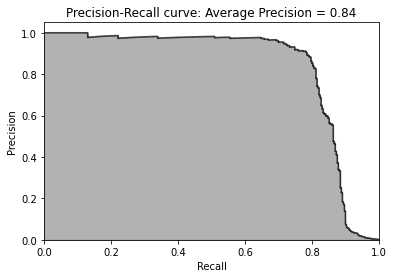

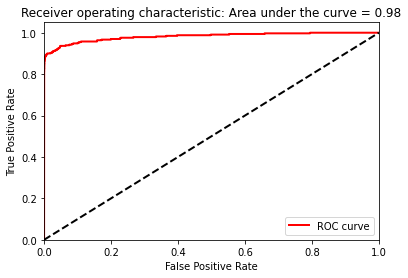

In [48]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLightGBMGradientBoosting = preds.copy()

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [49]:
# Test Set Evaluation

In [50]:
predictionsTestSetLogisticRegression = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetLogisticRegression.loc[:,'prediction'] = \
    logReg.predict_proba(X_test)[:,1]
logLossTestSetLogisticRegression = \
    log_loss(y_test, predictionsTestSetLogisticRegression)

In [51]:
predictionsTestSetRandomForests = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetRandomForests.loc[:,'prediction'] = \
    RFC.predict_proba(X_test)[:,1]
logLossTestSetRandomForests = \
    log_loss(y_test, predictionsTestSetRandomForests)

In [52]:
predictionsTestSetXGBoostGradientBoosting = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
dtest = xgb.DMatrix(data=X_test)
predictionsTestSetXGBoostGradientBoosting.loc[:,'prediction'] = \
    bst.predict(dtest)
logLossTestSetXGBoostGradientBoosting = \
    log_loss(y_test, predictionsTestSetXGBoostGradientBoosting)

In [53]:
predictionsTestSetLightGBMGradientBoosting = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetLightGBMGradientBoosting.loc[:,'prediction'] = \
    gbm.predict(X_test, num_iteration=gbm.best_iteration)
logLossTestSetLightGBMGradientBoosting = \
    log_loss(y_test, predictionsTestSetLightGBMGradientBoosting)

In [54]:
print("Log Loss of Logistic Regression on Test Set: ", \
          logLossTestSetLogisticRegression)
print("Log Loss of Random Forests on Test Set: ", \
          logLossTestSetRandomForests)
print("Log Loss of XGBoost Gradient Boosting on Test Set: ", \
          logLossTestSetXGBoostGradientBoosting)
print("Log Loss of LightGBM Gradient Boosting on Test Set: ", \
          logLossTestSetLightGBMGradientBoosting)

Log Loss of Logistic Regression on Test Set:  0.09674819407933438
Log Loss of Random Forests on Test Set:  0.009018284462863804
Log Loss of XGBoost Gradient Boosting on Test Set:  0.0024243744683651214
Log Loss of LightGBM Gradient Boosting on Test Set:  0.002523122137335972


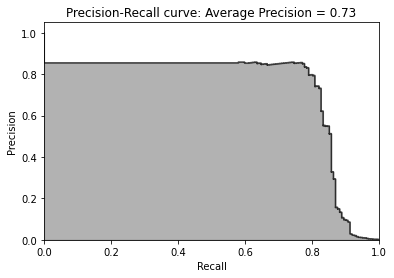

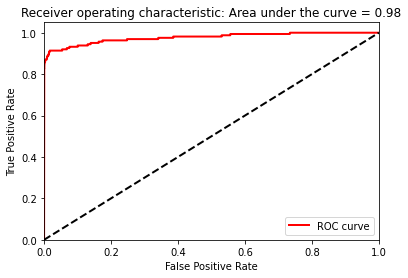

In [55]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetLogisticRegression)
average_precision = \
    average_precision_score(y_test,predictionsTestSetLogisticRegression)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(y_test,predictionsTestSetLogisticRegression)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

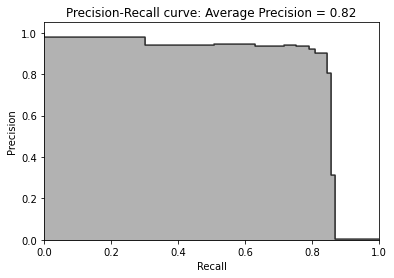

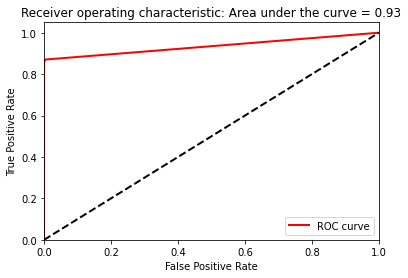

In [56]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetRandomForests)
average_precision = \
    average_precision_score(y_test,predictionsTestSetRandomForests)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(y_test,predictionsTestSetRandomForests)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

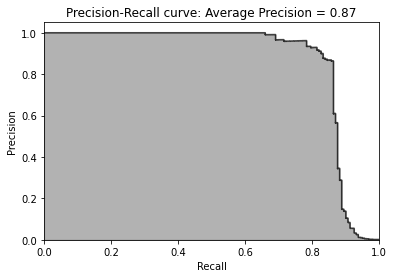

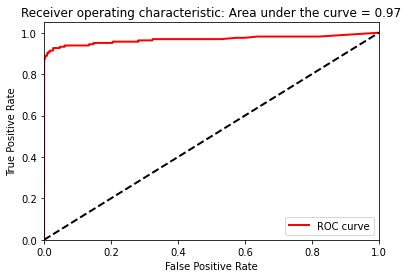

In [57]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetXGBoostGradientBoosting)
average_precision = \
    average_precision_score(y_test,predictionsTestSetXGBoostGradientBoosting)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = \
    roc_curve(y_test,predictionsTestSetXGBoostGradientBoosting)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

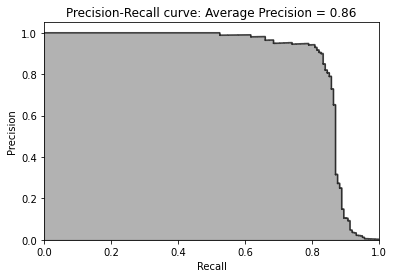

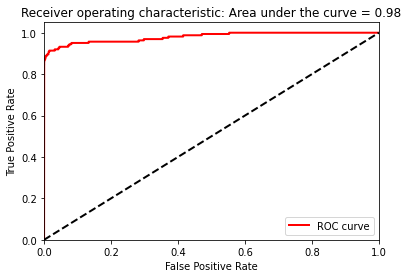

In [58]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetLightGBMGradientBoosting)
average_precision = \
    average_precision_score(y_test,predictionsTestSetLightGBMGradientBoosting)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = \
    roc_curve(y_test,predictionsTestSetLightGBMGradientBoosting)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [59]:
# Ensemble

In [60]:
predictionsBasedOnKFoldsFourModels = pd.DataFrame(data=[],index=y_train.index)
predictionsBasedOnKFoldsFourModels = predictionsBasedOnKFoldsFourModels.join(
    predictionsBasedOnKFoldsLogisticRegression['prediction'].astype(float), \
    how='left').join(predictionsBasedOnKFoldsRandomForests['prediction'] \
    .astype(float),how='left',rsuffix="2").join( \
    predictionsBasedOnKFoldsXGBoostGradientBoosting['prediction'].astype(float), \
    how='left',rsuffix="3").join( \
    predictionsBasedOnKFoldsLightGBMGradientBoosting['prediction'].astype(float), \
    how='left',rsuffix="4")
predictionsBasedOnKFoldsFourModels.columns = \
    ['predsLR','predsRF','predsXGB','predsLightGBM']

In [61]:
X_trainWithPredictions = \
    X_train.merge(predictionsBasedOnKFoldsFourModels,
                  left_index=True,right_index=True)

In [62]:
params_lightGB = {
    'task': 'train',
    'application':'binary',
    'num_class':1,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'bagging_seed': 2018,
    'verbose': 0,
    'num_threads':24
}

In [63]:
trainingScores = []
cvScores = []
predictionsBasedOnKFoldsEnsemble = \
    pd.DataFrame(data=[],index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), \
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = \
        X_trainWithPredictions.iloc[train_index,:], \
        X_trainWithPredictions.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
    
    lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
                   valid_sets=lgb_eval, early_stopping_rounds=200)
    
    loglossTraining = log_loss(y_train_fold, \
        gbm.predict(X_train_fold, num_iteration=gbm.best_iteration))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFoldsEnsemble.loc[X_cv_fold.index,'prediction'] = \
        gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration) 
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFoldsEnsemble.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossEnsemble = log_loss(y_train, \
        predictionsBasedOnKFoldsEnsemble.loc[:,'prediction'])
print('Ensemble Log Loss: ', loglossEnsemble)

[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027773 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_logloss: 0.00552298
Training until validation scores don't improve for 200 rounds
[2]	valid_0's binary_logloss: 0.00545912
[3]	valid_0's binary_logloss: 0.00540874
[4]	valid_0's binary_logloss: 0.00536259
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_logloss: 0.00531639
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

[134]	valid_0's binary_logloss: 0.003107
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[135]	valid_0's binary_logloss: 0.0031018
[136]	valid_0's binary_logloss: 0.00309583
[137]	valid_0's binary_logloss: 0.0030898
[138]	valid_0's binary_logloss: 0.0030838
[139]	valid_0's binary_logloss: 0.00307803
[140]	valid_0's binary_logloss: 0.00307252
[141]	valid_0's binary_logloss: 0.00306695
[142]	valid_0's binary_logloss: 0.00306116
[143]	valid_0's binary_logloss: 0.00305591
[144]	valid_0's binary_logloss: 0.0030504
[145]	valid_0's binary_logloss: 0.00304494
[146]	valid_0's binary_logloss: 0.00304011
[147]	valid_0's binary_logloss: 0.00303413
[148]	valid_0's binary_logloss: 0.00302909
[149]	valid_0's binary_logloss: 0.00302307
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[150]	valid_0's binary_logloss: 0.00301683
[151]	valid_0's binary_logloss: 0.00301228
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[152]	v

[272]	valid_0's binary_logloss: 0.00268927
[273]	valid_0's binary_logloss: 0.00268871
[274]	valid_0's binary_logloss: 0.00268692
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[275]	valid_0's binary_logloss: 0.00268557
[276]	valid_0's binary_logloss: 0.00268459
[277]	valid_0's binary_logloss: 0.00268413
[278]	valid_0's binary_logloss: 0.00268345
[279]	valid_0's binary_logloss: 0.00268301
[280]	valid_0's binary_logloss: 0.00268299
[281]	valid_0's binary_logloss: 0.00268133
[282]	valid_0's binary_logloss: 0.00268033
[283]	valid_0's binary_logloss: 0.00267835
[284]	valid_0's binary_logloss: 0.00267754
[285]	valid_0's binary_logloss: 0.0026775
[286]	valid_0's binary_logloss: 0.00267606
[287]	valid_0's binary_logloss: 0.00267554
[288]	valid_0's binary_logloss: 0.00267479
[289]	valid_0's binary_logloss: 0.00267209
[290]	valid_0's binary_logloss: 0.00267206
[291]	valid_0's binary_logloss: 0.00267062
[292]	valid_0's binary_logloss: 0.00267053
[293]	valid_0's binary_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[405]	valid_0's binary_logloss: 0.00259863
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[406]	valid_0's binary_logloss: 0.00259843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[407]	valid_0's binary_logloss: 0.00259864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[408]	valid_0's binary_logloss: 0.00259813
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[409]	valid_0's binary_logloss: 0.00259903
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[410]	valid_0's binary_logloss: 0.00259743
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[411]	valid_0's binary_logloss: 0.00259667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[412]	valid_0's binary_logloss: 0.00259603
[LightGBM] [Warning] No further splits with positive gai

[486]	valid_0's binary_logloss: 0.00257337
[487]	valid_0's binary_logloss: 0.00257269
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[488]	valid_0's binary_logloss: 0.00257199
[489]	valid_0's binary_logloss: 0.00257279
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[490]	valid_0's binary_logloss: 0.00257304
[491]	valid_0's binary_logloss: 0.0025722
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[492]	valid_0's binary_logloss: 0.00257232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[493]	valid_0's binary_logloss: 0.00257214
[494]	valid_0's binary_logloss: 0.00257304
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[495]	valid_0's binary_logloss: 0.00257286
[496]	valid_0's binary_logloss: 0.00257311
[497]	valid_0's binary_logloss: 0.00257291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[498]	valid_0's binary_logloss: 0.0

[572]	valid_0's binary_logloss: 0.00259156
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[573]	valid_0's binary_logloss: 0.00259222
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[574]	valid_0's binary_logloss: 0.00259237
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[575]	valid_0's binary_logloss: 0.00259225
[576]	valid_0's binary_logloss: 0.00259242
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[577]	valid_0's binary_logloss: 0.00259314
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[578]	valid_0's binary_logloss: 0.00259303
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[579]	valid_0's binary_logloss: 0.0025929
[580]	valid_0's binary_logloss: 0.00259226
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[581]	valid_0's binary_logloss: 0.00259292
[582]	valid_0's binary_logloss: 0.00259335
[Li

[654]	valid_0's binary_logloss: 0.00260527
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[655]	valid_0's binary_logloss: 0.00260578
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[656]	valid_0's binary_logloss: 0.00260605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[657]	valid_0's binary_logloss: 0.00260666
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[658]	valid_0's binary_logloss: 0.00260657
[659]	valid_0's binary_logloss: 0.00260627
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[660]	valid_0's binary_logloss: 0.00260725
[661]	valid_0's binary_logloss: 0.00260731
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[662]	valid_0's binary_logloss: 0.00260716
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[663]	valid_0's binary_logloss: 0.00260706
[664]	valid_0's binary_logloss: 0.0026065
[Li

[77]	valid_0's binary_logloss: 0.00395913
[78]	valid_0's binary_logloss: 0.00394694
[79]	valid_0's binary_logloss: 0.00393623
[80]	valid_0's binary_logloss: 0.00392457
[81]	valid_0's binary_logloss: 0.00391325
[82]	valid_0's binary_logloss: 0.00390241
[83]	valid_0's binary_logloss: 0.00388906
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[84]	valid_0's binary_logloss: 0.00387879
[85]	valid_0's binary_logloss: 0.00386611
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[86]	valid_0's binary_logloss: 0.00385643
[87]	valid_0's binary_logloss: 0.00384687
[88]	valid_0's binary_logloss: 0.00383487
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[89]	valid_0's binary_logloss: 0.00382387
[90]	valid_0's binary_logloss: 0.00381267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[91]	valid_0's binary_logloss: 0.0038037
[92]	valid_0's binary_logloss: 0.00379483
[93]	valid_0's binary_logloss

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[189]	valid_0's binary_logloss: 0.00322003
[190]	valid_0's binary_logloss: 0.00321631
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[191]	valid_0's binary_logloss: 0.00321331
[192]	valid_0's binary_logloss: 0.00321083
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[193]	valid_0's binary_logloss: 0.00320782
[194]	valid_0's binary_logloss: 0.00320357
[195]	valid_0's binary_logloss: 0.00320106
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[196]	valid_0's binary_logloss: 0.00319734
[197]	valid_0's binary_logloss: 0.00319415
[198]	valid_0's binary_logloss: 0.00319114
[199]	valid_0's binary_logloss: 0.00318899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[200]	valid_0's binary_logloss: 0.00318659
[201]	valid_0's binary_logloss: 0.00318415
[LightGBM] [Warning] No further splits with positive gain, best ga

[311]	valid_0's binary_logloss: 0.00306935
[312]	valid_0's binary_logloss: 0.0030696
[313]	valid_0's binary_logloss: 0.00307014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[314]	valid_0's binary_logloss: 0.00307059
[315]	valid_0's binary_logloss: 0.00307115
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[316]	valid_0's binary_logloss: 0.00307137
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[317]	valid_0's binary_logloss: 0.00307161
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[318]	valid_0's binary_logloss: 0.00307011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[319]	valid_0's binary_logloss: 0.00306974
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[320]	valid_0's binary_logloss: 0.00306939
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[321]	valid_0's binary_logloss: 0.00306945
[Li

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[384]	valid_0's binary_logloss: 0.00309945
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[385]	valid_0's binary_logloss: 0.00310042
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[386]	valid_0's binary_logloss: 0.00310077
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[387]	valid_0's binary_logloss: 0.00310163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[388]	valid_0's binary_logloss: 0.00310215
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[389]	valid_0's binary_logloss: 0.00310361
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[390]	valid_0's binary_logloss: 0.00310394
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[391]	valid_0's binary_logloss: 0.00310477
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[456]	valid_0's binary_logloss: 0.00314202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[457]	valid_0's binary_logloss: 0.00314252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[458]	valid_0's binary_logloss: 0.00314214
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[459]	valid_0's binary_logloss: 0.00314355
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[460]	valid_0's binary_logloss: 0.00314316
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[461]	valid_0's binary_logloss: 0.00314328
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[462]	valid_0's binary_logloss: 0.00314391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[463]	valid_0's binary_logloss: 0.00314562
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[32]	valid_0's binary_logloss: 0.00422244
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[33]	valid_0's binary_logloss: 0.00419852
[34]	valid_0's binary_logloss: 0.00417062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[35]	valid_0's binary_logloss: 0.0041485
[36]	valid_0's binary_logloss: 0.00412438
[37]	valid_0's binary_logloss: 0.00409959
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[38]	valid_0's binary_logloss: 0.00407609
[39]	valid_0's binary_logloss: 0.00405065
[40]	valid_0's binary_logloss: 0.00402897
[41]	valid_0's binary_logloss: 0.00400545
[42]	valid_0's binary_logloss: 0.00397994
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[43]	valid_0's binary_logloss: 0.0039578
[44]	valid_0's binary_logloss: 0.00393899
[45]	valid_0's binary_logloss: 0.0039181
[LightGBM] [Warning] No further splits w

[149]	valid_0's binary_logloss: 0.00283133
[150]	valid_0's binary_logloss: 0.00282637
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[151]	valid_0's binary_logloss: 0.00282225
[152]	valid_0's binary_logloss: 0.00281773
[153]	valid_0's binary_logloss: 0.0028129
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[154]	valid_0's binary_logloss: 0.00280908
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[155]	valid_0's binary_logloss: 0.00280539
[156]	valid_0's binary_logloss: 0.00280086
[157]	valid_0's binary_logloss: 0.00279608
[158]	valid_0's binary_logloss: 0.00279198
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[159]	valid_0's binary_logloss: 0.00278862
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[160]	valid_0's binary_logloss: 0.00278284
[161]	valid_0's binary_logloss: 0.00277884
[162]	valid_0's binary_logloss: 0.00277492
[163]	valid_0's binary_l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[255]	valid_0's binary_logloss: 0.00257595
[256]	valid_0's binary_logloss: 0.00257464
[257]	valid_0's binary_logloss: 0.00257377
[258]	valid_0's binary_logloss: 0.00257316
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[259]	valid_0's binary_logloss: 0.00257204
[260]	valid_0's binary_logloss: 0.00257124
[261]	valid_0's binary_logloss: 0.00257155
[262]	valid_0's binary_logloss: 0.00257114
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[263]	valid_0's binary_logloss: 0.00257012
[264]	valid_0's binary_logloss: 0.00256986
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[265]	valid_0's binary_logloss: 0.00256887
[266]	valid_0's binary_logloss: 0.00256801
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[267]	valid_0's binary_logloss: 0.00256727
[268]	valid_0's binary_logloss: 0.00256711
[269]	valid_0's binary_

[371]	valid_0's binary_logloss: 0.0025356
[372]	valid_0's binary_logloss: 0.00253548
[373]	valid_0's binary_logloss: 0.00253362
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[374]	valid_0's binary_logloss: 0.00253368
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[375]	valid_0's binary_logloss: 0.00253339
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[376]	valid_0's binary_logloss: 0.00253343
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[377]	valid_0's binary_logloss: 0.00253354
[378]	valid_0's binary_logloss: 0.00253291
[379]	valid_0's binary_logloss: 0.00253282
[380]	valid_0's binary_logloss: 0.00253157
[381]	valid_0's binary_logloss: 0.00253127
[382]	valid_0's binary_logloss: 0.00253147
[383]	valid_0's binary_logloss: 0.00253076
[384]	valid_0's binary_logloss: 0.00253116
[385]	valid_0's binary_logloss: 0.00253088
[386]	valid_0's binary_logloss: 0.00252953
[387]	valid_0

[490]	valid_0's binary_logloss: 0.00251384
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[491]	valid_0's binary_logloss: 0.0025134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[492]	valid_0's binary_logloss: 0.0025127
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[493]	valid_0's binary_logloss: 0.00251264
[494]	valid_0's binary_logloss: 0.00251269
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[495]	valid_0's binary_logloss: 0.0025125
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[496]	valid_0's binary_logloss: 0.00251286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[497]	valid_0's binary_logloss: 0.002513
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[498]	valid_0's binary_logloss: 0.00251226
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[499]	valid_0's bi

[565]	valid_0's binary_logloss: 0.00250801
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[566]	valid_0's binary_logloss: 0.00250761
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[567]	valid_0's binary_logloss: 0.00250792
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[568]	valid_0's binary_logloss: 0.00250799
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[569]	valid_0's binary_logloss: 0.00250908
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[570]	valid_0's binary_logloss: 0.00250873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[571]	valid_0's binary_logloss: 0.00250874
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[572]	valid_0's binary_logloss: 0.00250875
[573]	valid_0's binary_logloss: 0.00250812
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[574]	valid_0

[642]	valid_0's binary_logloss: 0.00250554
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[643]	valid_0's binary_logloss: 0.00250549
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[644]	valid_0's binary_logloss: 0.0025052
[645]	valid_0's binary_logloss: 0.00250488
[646]	valid_0's binary_logloss: 0.00250405
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[647]	valid_0's binary_logloss: 0.00250392
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[648]	valid_0's binary_logloss: 0.00250412
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[649]	valid_0's binary_logloss: 0.00250395
[650]	valid_0's binary_logloss: 0.00250335
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[651]	valid_0's binary_logloss: 0.00250388
[652]	valid_0's binary_logloss: 0.00250362
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[65

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[729]	valid_0's binary_logloss: 0.00251701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[730]	valid_0's binary_logloss: 0.00251708
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[731]	valid_0's binary_logloss: 0.00251764
[732]	valid_0's binary_logloss: 0.00251796
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[733]	valid_0's binary_logloss: 0.00251761
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[734]	valid_0's binary_logloss: 0.00251694
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[735]	valid_0's binary_logloss: 0.00251722
[736]	valid_0's binary_logloss: 0.00251701
[737]	valid_0's binary_logloss: 0.00251732
[738]	valid_0's binary_logloss: 0.0025178
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[739]	valid_0's binary_logloss: 0.00251834
[Li

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[816]	valid_0's binary_logloss: 0.00253068
[817]	valid_0's binary_logloss: 0.0025302
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[818]	valid_0's binary_logloss: 0.00252994
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[819]	valid_0's binary_logloss: 0.00253069
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[820]	valid_0's binary_logloss: 0.00253126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[821]	valid_0's binary_logloss: 0.00253096
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[822]	valid_0's binary_logloss: 0.00253106
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[823]	valid_0's binary_logloss: 0.00253102
[824]	valid_0's binary_logloss: 0.00253122
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[825]	valid_0'

[32]	valid_0's binary_logloss: 0.00448924
[33]	valid_0's binary_logloss: 0.00446018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[34]	valid_0's binary_logloss: 0.00443363
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[35]	valid_0's binary_logloss: 0.00440042
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[36]	valid_0's binary_logloss: 0.00437306
[37]	valid_0's binary_logloss: 0.00434639
[38]	valid_0's binary_logloss: 0.00432333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[39]	valid_0's binary_logloss: 0.00429739
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	valid_0's binary_logloss: 0.00427114
[41]	valid_0's binary_logloss: 0.00424819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[42]	valid_0's binary_logloss: 0.00422202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[43]	valid_0'

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[167]	valid_0's binary_logloss: 0.00287815
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[168]	valid_0's binary_logloss: 0.00287574
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[169]	valid_0's binary_logloss: 0.00287277
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[170]	valid_0's binary_logloss: 0.0028702
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[171]	valid_0's binary_logloss: 0.00286737
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[172]	valid_0's binary_logloss: 0.00286486
[173]	valid_0's binary_logloss: 0.00286154
[174]	valid_0's binary_logloss: 0.00285873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[175]	valid_0's binary_logloss: 0.0028558
[176]	valid_0's binary_logloss: 0.00285296
[177]	valid_0's binary_logloss: 0.00285054
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[287]	valid_0's binary_logloss: 0.00263841
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[288]	valid_0's binary_logloss: 0.00263778
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[289]	valid_0's binary_logloss: 0.00263654
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[290]	valid_0's binary_logloss: 0.00263549
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[291]	valid_0's binary_logloss: 0.00263423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[292]	valid_0's binary_logloss: 0.00263379
[293]	valid_0's binary_logloss: 0.00263335
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[294]	valid_0's binary_logloss: 0.00263279
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[295]	valid_0's binary_logloss: 0.0026318
[LightGBM] [Wa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[386]	valid_0's binary_logloss: 0.00259156
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[387]	valid_0's binary_logloss: 0.00259146
[388]	valid_0's binary_logloss: 0.00259096
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[389]	valid_0's binary_logloss: 0.00259123
[390]	valid_0's binary_logloss: 0.00259154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[391]	valid_0's binary_logloss: 0.00259208
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[392]	valid_0's binary_logloss: 0.00259188
[393]	valid_0's binary_logloss: 0.00259118
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[394]	valid_0's binary_logloss: 0.00259041
[395]	valid_0's binary_logloss: 0.00259072
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[396]	valid_0's binary_logloss: 0.00259056
[L

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[471]	valid_0's binary_logloss: 0.00259783
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[472]	valid_0's binary_logloss: 0.00259775
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[473]	valid_0's binary_logloss: 0.00259813
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[474]	valid_0's binary_logloss: 0.00259777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[475]	valid_0's binary_logloss: 0.0025974
[476]	valid_0's binary_logloss: 0.00259797
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[477]	valid_0's binary_logloss: 0.00259949
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[478]	valid_0's binary_logloss: 0.00259915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[479]	valid_0's binary_logloss: 0.00259819
[LightGBM] [Wa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[558]	valid_0's binary_logloss: 0.00259627
[559]	valid_0's binary_logloss: 0.00259635
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[560]	valid_0's binary_logloss: 0.00259675
[561]	valid_0's binary_logloss: 0.00259694
[562]	valid_0's binary_logloss: 0.00259701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[563]	valid_0's binary_logloss: 0.00259672
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[564]	valid_0's binary_logloss: 0.0025966
[565]	valid_0's binary_logloss: 0.00259671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[566]	valid_0's binary_logloss: 0.00259641
[567]	valid_0's binary_logloss: 0.0025965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[568]	valid_0's binary_logloss: 0.00259691
[569]	valid_0's binary_logloss: 0.00259614
[570]	valid_0's binary_logloss: 0.00

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[26]	valid_0's binary_logloss: 0.00510528
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[27]	valid_0's binary_logloss: 0.00507988
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[28]	valid_0's binary_logloss: 0.00505458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[29]	valid_0's binary_logloss: 0.00502878
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[30]	valid_0's binary_logloss: 0.00500365
[31]	valid_0's binary_logloss: 0.00497966
[32]	valid_0's binary_logloss: 0.00495469
[33]	valid_0's binary_logloss: 0.00492899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[34]	valid_0's binary_logloss: 0.00490422
[35]	valid_0's binary_logloss: 0.00488246
[36]	valid_0's binary_logloss: 0.00486019
[37]	valid_0's binary_logloss: 0.00483834
[38]	valid_0's binary_logloss: 0.00481729
[39]

[127]	valid_0's binary_logloss: 0.00379036
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[128]	valid_0's binary_logloss: 0.00378488
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[129]	valid_0's binary_logloss: 0.00377857
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[130]	valid_0's binary_logloss: 0.00377262
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[131]	valid_0's binary_logloss: 0.00376635
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[132]	valid_0's binary_logloss: 0.00376035
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[133]	valid_0's binary_logloss: 0.00375416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[134]	valid_0's binary_logloss: 0.00374814
[135]	valid_0's binary_logloss: 0.00374237
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[136]	valid_0

[250]	valid_0's binary_logloss: 0.00343033
[251]	valid_0's binary_logloss: 0.00342995
[252]	valid_0's binary_logloss: 0.00342951
[253]	valid_0's binary_logloss: 0.00342984
[254]	valid_0's binary_logloss: 0.00343036
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[255]	valid_0's binary_logloss: 0.00342937
[256]	valid_0's binary_logloss: 0.00342827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[257]	valid_0's binary_logloss: 0.00342737
[258]	valid_0's binary_logloss: 0.00342629
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[259]	valid_0's binary_logloss: 0.00342668
[260]	valid_0's binary_logloss: 0.0034253
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[261]	valid_0's binary_logloss: 0.00342575
[262]	valid_0's binary_logloss: 0.00342626
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[263]	valid_0's binary_logloss: 0.00342634
[264]	valid_0's binary_l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[339]	valid_0's binary_logloss: 0.00343112
[340]	valid_0's binary_logloss: 0.00343283
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[341]	valid_0's binary_logloss: 0.00343257
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[342]	valid_0's binary_logloss: 0.0034329
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[343]	valid_0's binary_logloss: 0.00343436
[344]	valid_0's binary_logloss: 0.00343439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[345]	valid_0's binary_logloss: 0.00343441
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[346]	valid_0's binary_logloss: 0.00343508
[347]	valid_0's binary_logloss: 0.00343618
[348]	valid_0's binary_logloss: 0.00343694
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[349]	valid_0's binary_logloss: 0.00343729
[Li

[450]	valid_0's binary_logloss: 0.00350572
[451]	valid_0's binary_logloss: 0.00350627
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[452]	valid_0's binary_logloss: 0.003507
[453]	valid_0's binary_logloss: 0.00350948
[454]	valid_0's binary_logloss: 0.00351005
[455]	valid_0's binary_logloss: 0.00350939
[456]	valid_0's binary_logloss: 0.00351062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[457]	valid_0's binary_logloss: 0.00351131
[458]	valid_0's binary_logloss: 0.00351359
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[459]	valid_0's binary_logloss: 0.00351387
[460]	valid_0's binary_logloss: 0.00351486
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[461]	valid_0's binary_logloss: 0.00351589
[462]	valid_0's binary_logloss: 0.00351755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[463]	valid_0's binary_logloss: 0.00351829
[LightGBM] [Warning] No f

In [64]:
print('Feature importances:', list(gbm.feature_importance()))

Feature importances: [109, 114, 38, 68, 204, 61, 39, 217, 155, 41, 90, 70, 153, 92, 341, 63, 102, 38, 50, 262, 60, 96, 186, 71, 99, 167, 190, 64, 107, 285, 102, 300, 123, 350]


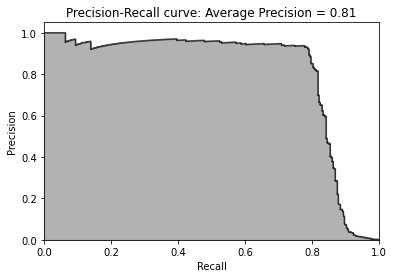

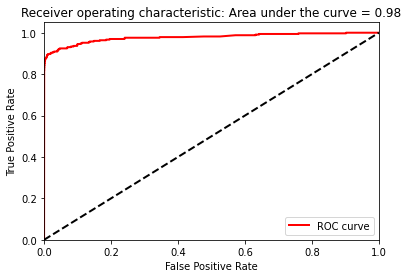

In [65]:
preds = pd.concat([y_train,predictionsBasedOnKFoldsEnsemble.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

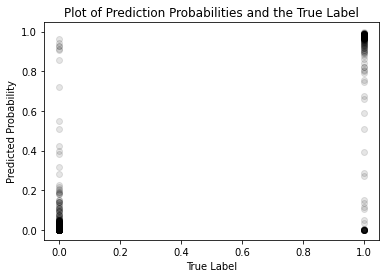

In [66]:
scatterData = predictionsTestSetLightGBMGradientBoosting.join(y_test,how='left')
scatterData.columns = ['Predicted Probability','True Label']
ax = sns.regplot(x="True Label", y="Predicted Probability", color='k', 
                 fit_reg=False, scatter_kws={'alpha':0.1},
                 data=scatterData).set_title( \
                'Plot of Prediction Probabilities and the True Label')

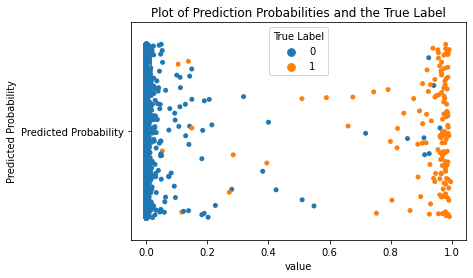

In [67]:
scatterDataMelted = pd.melt(scatterData, "True Label", \
                            var_name="Predicted Probability")
ax = sns.stripplot(x="value", y="Predicted Probability", \
                   hue='True Label', jitter=0.4, \
                   data=scatterDataMelted).set_title( \
                   'Plot of Prediction Probabilities and the True Label')

In [ ]:
'''Pipeline for New Data'''
# first, import new data into a dataframe called 'newData'
# second, scale data
# newData.loc[:,featuresToScale] = sX.transform(newData[featuresToScale])
# third, predict using LightGBM
# gbm.predict(newData, num_iteration=gbm.best_iteration)